In [1]:
# for data importing and storing
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for cohen's d function:
from statistics import mean, stdev
import math
from math import sqrt

# for statistical analysis
from scipy.stats import ttest_ind


# helper function
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

## 1. Loading the data

Data is available from the EDMOND repository [Modulation of behavior in zebrafish by the neuropeptide PTH2](https://dx.doi.org/10.17617/3.6v). Individual data files should be placed within the same folder as the scripts, otherwise, file locations need to be updated in the cell below. 

The _velocity_ dataframe contains 4 columns: 
- **experiment** defaults to _tripartite_, indicating that the data was obtained in the open field paradigm.
- **genotype**: either _wt_ (for $pth2^{+/+}$) or _ko_ (fo $pth2^{-/-}$).
- **age**: defaults to 56 dpf to match the age of the animals in the shoaling experiments
- **value**: speed of the animals in pixels per second. Will be transformed to cm per second in the following steps.

In [3]:
df = pd.read_excel(r'.\velocity.xlsx' , sheet_name = 'import')
df.head()
len(df)

65

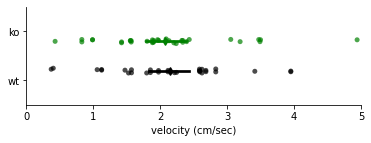

In [39]:
f, ax = plt.subplots(figsize = (6,1.8))
sns.despine(right=True)

# Show each observation with a scatterplot
sns.stripplot(x="velocity_in_cm", y="genotype", hue="genotype",
              data=df, dodge=True, alpha=.7, zorder=1 , order=['ko', 'wt'] , palette=['k', 'g'])

# Show the conditional means
sns.pointplot(x="velocity_in_cm", y="genotype", hue="genotype",
              data=df, dodge=.4, join=False, palette=['k', 'g'],
              markers="d", scale=.75, ci=95 , order=['ko', 'wt'])

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], title="genotype",
          handletextpad=0, columnspacing=1,
          ncol=1, frameon=True)
ax.set(xlabel='velocity (cm/sec)', ylabel='',
       xlim = [0, 5])
ax.get_legend().remove()


plt.savefig("extFig3D.svg")

In [36]:
# statistical evaulation
t, p  =ttest_ind(df[df['genotype'] == 'wt']['velocity_in_cm'] , 
               df[df['genotype'] == 'ko']['velocity_in_cm'] )

In [38]:
print("p value: " + str(p))
print("t = " + str(t))
# report central tendencies
print("effect size: " + str(cohend(df[df['genotype'] == 'wt']['velocity_in_cm'] , 
               df[df['genotype'] == 'ko']['velocity_in_cm'])))
print("mean value wildtype: " + str(np.mean(df[df["genotype"] == 'wt']["velocity_in_cm"])))
print("mean value mutant: " + str(np.mean(df[df["genotype"] == 'ko']["velocity_in_cm"])))

p value: 0.7660116005748333
t = 0.29888486744380977
effect size: 0.0742233069669157
mean value wildtype: 2.140325516129032
mean value mutant: 2.074604794117647
